# Introduction

Cryptocurrencies have gained immense popularity in recent years, with Bitcoin being one of the most well-known digital currencies. Understanding the historical trends and patterns of cryptocurrency prices is crucial for investors and traders. In this blog, we will explore how to use Decision Trees to analyze cryptocurrency prices using the Bitcoin Historical Data dataset from Kaggle. We will cover the steps from importing the dataset to evaluating the model's performance and visualizing the Decision Tree. By the end of this blog, you will have learned how to use a Decision Tree model to predict the price change of Bitcoin and how to use it to make investment decisions or build a trading strategy.

**[READ MORE](https://medium.com/@yennhi95zz/exploring-cryptocurrency-prices-using-decision-trees-a-guide-using-bitcoin-historical-data-from-fce4f3e66cca)**



In [1]:
!pip install --upgrade graphviz

import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.tree import export_graphviz
import graphviz


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 1.6 MB/s eta 0:00:00
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.8.4
    Uninstalling graphviz-0.8.4:
      Successfully uninstalled graphviz-0.8.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mxnet 1.9.1 requires graphviz<0.9.0,>=0.8.1, but you have graphviz 0.20.1 which is incompatible.


In [2]:
# Load the dataset
bitcoin_df = pd.read_csv('/kaggle/input/bitcoin-historical-data/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')
bitcoin_df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Check missing values
print(bitcoin_df.isnull().sum())

# Remove rows with null values
bitcoin_df.dropna(inplace=True)

Timestamp                  0
Open                 1243608
High                 1243608
Low                  1243608
Close                1243608
Volume_(BTC)         1243608
Volume_(Currency)    1243608
Weighted_Price       1243608
dtype: int64


In [4]:
# Create a new column to represent the closing price
bitcoin_df['Closing Price'] = (bitcoin_df['High'] + bitcoin_df['Low'])/2

# Drop unnecessary columns
bitcoin_df = bitcoin_df[['Timestamp', 'Closing Price']]

In [5]:
# Calculate daily price change
bitcoin_df['Price Change'] = bitcoin_df['Closing Price'].pct_change()

In [6]:
# Drop the first row since it has a null value
bitcoin_df.dropna(inplace=True)

In [7]:
# Split the dataset into training and testing sets
X = bitcoin_df['Timestamp'].values.reshape(-1,1)
y = bitcoin_df['Price Change']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Decision Tree model
model = DecisionTreeRegressor(max_depth=5, random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [8]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error: {:.2f}%'.format(mae*100))

Mean Absolute Error: 0.08%


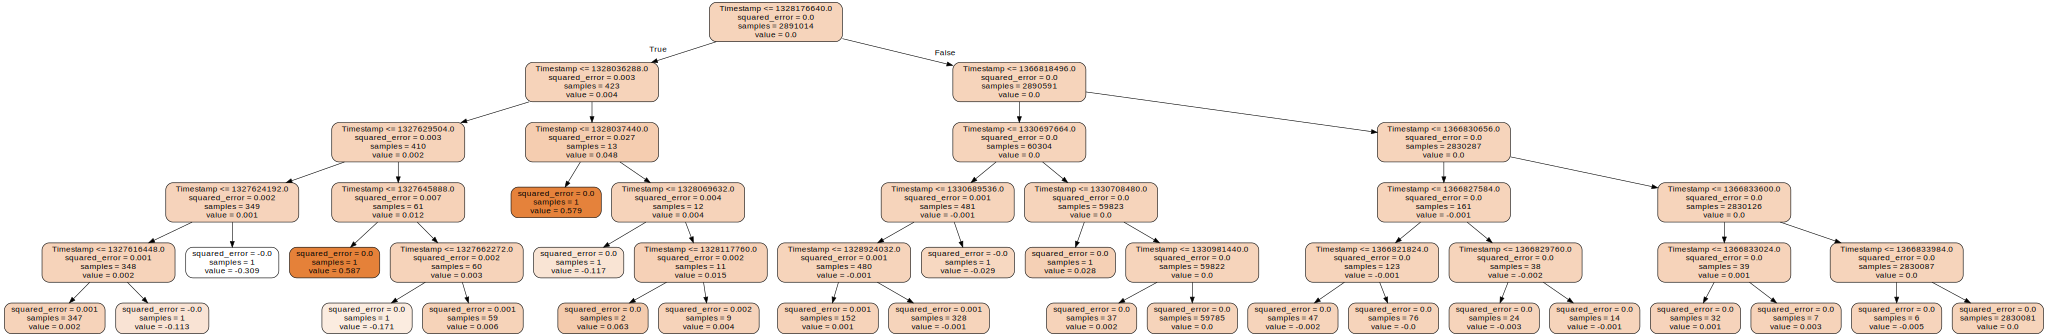

In [9]:
# Export the Decision Tree model to a DOT file
dot_data = export_graphviz(model, out_file=None, filled=True, rounded=True, feature_names=['Timestamp'])
graph = graphviz.Source(dot_data)

# Display the Decision Tree model
graph

# Contact Me 📩

If you have any questions or comments about my work, feel free to get in touch! You can find me on the following platforms:

- [Medium](https://medium.com/@yennhi95zz) 📝
- [Kaggle](https://medium.com/r/?url=https%3A%2F%2Fwww.kaggle.com%2Fnhiyen%2Fcode) 📊
- [GitHub](https://medium.com/r/?url=https%3A%2F%2Fgithub.com%2Fyennhi95zz) 💻
- [LinkedIn](https://www.linkedin.com/in/nhi-yen/) 👥

Don't forget to subscribe to my Medium, Kaggle, Github, and LinkedIn profiles to stay updated on my latest work! 🔔👀